In [4]:
# Importing Libraries

# data analysis and wrangling
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score

# Data Loading
import os

In [5]:
# Loading dataset
os.chdir("C:\\04-AIML\\07 Unsupervised Learning")
df = pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")

In [6]:
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check Missing Value
df.isnull().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [8]:
df=df.dropna() # Dropping Null Values

In [9]:
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [10]:
# Top 10 players performed highest sixes
a=df.groupby('Name')['Sixes'].sum().sort_values(ascending = False ).head(10)
a

Name
CH Gayle        59.0
DJ Bravo        20.0
KP Pietersen    20.0
CL White        20.0
V Sehwag        19.0
SK Raina        19.0
S Dhawan        18.0
RG Sharma       18.0
G Gambhir       17.0
F du Plessis    17.0
Name: Sixes, dtype: float64

In [11]:
# Top 10 players performed highest Runs
a=df.groupby('Name')['Runs'].sum().sort_values(ascending = False ).head(10)
a

Name
CH Gayle         733.0
G Gambhir        590.0
S Dhawan         569.0
AM Rahane        560.0
V Sehwag         495.0
CL White         479.0
R Dravid         462.0
SK Raina         441.0
RG Sharma        433.0
Mandeep Singh    432.0
Name: Runs, dtype: float64

In [12]:
# Top 10 players performed highest Half Centuries
a=df.groupby('Name')['HF'].sum().sort_values(ascending = False ).head(10)
a

Name
CH Gayle           9.0
G Gambhir          6.0
CL White           5.0
AM Rahane          5.0
S Dhawan           5.0
RG Sharma          5.0
V Sehwag           5.0
F du Plessis       3.0
DMD Jayawardene    3.0
KP Pietersen       3.0
Name: HF, dtype: float64

In [13]:
# Top 10 players performed highest Average
a=df.groupby('Name')['Ave'].sum().sort_values(ascending = False ).head(10)
a

Name
JP Duminy       81.33
CH Gayle        61.08
KP Pietersen    61.00
DJ Bravo        46.37
CL White        43.54
SR Watson       42.50
DB Das          42.00
S Dhawan        40.64
SPD Smith       40.22
AM Rahane       40.00
Name: Ave, dtype: float64

In [14]:
# Top 10 players performed highest Strike Rate
a=df.groupby('Name')['SR'].sum().sort_values(ascending = False ).head(10)
a

Name
DA Warner         164.10
V Sehwag          161.23
AB de Villiers    161.11
CH Gayle          160.74
DR Smith          160.20
JA Morkel         157.35
SR Watson         151.78
CL White          149.68
KP Pietersen      147.34
G Gambhir         143.55
Name: SR, dtype: float64

In [15]:
# Top 10 players performed highest Fours
a=df.groupby('Name')['Fours'].sum().sort_values(ascending = False ).head(10)
a

Name
AM Rahane          73.0
G Gambhir          64.0
R Dravid           63.0
S Dhawan           58.0
V Sehwag           57.0
Mandeep Singh      53.0
CH Gayle           46.0
CL White           41.0
DMD Jayawardene    39.0
RG Sharma          39.0
Name: Fours, dtype: float64

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

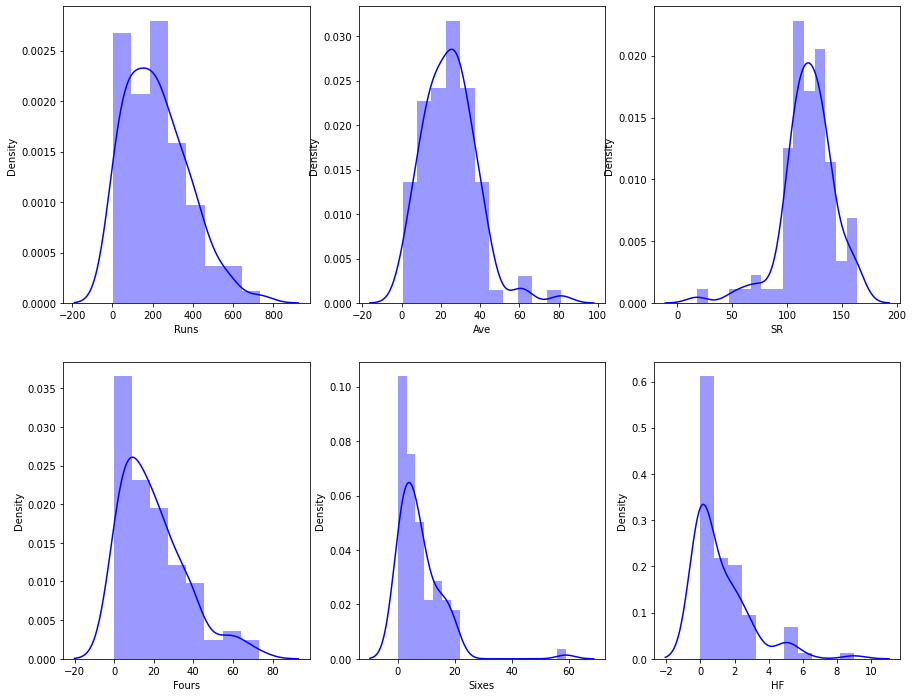

In [16]:
plt.figure(figsize=(15, 12))
col = 1
for i in df.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.distplot(df[i], color = 'b')
    col += 1

Data is not normally distributed and there is a skewness in the data for the attributes - Ave , SR , Fours , Sixes and HF

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\srikant

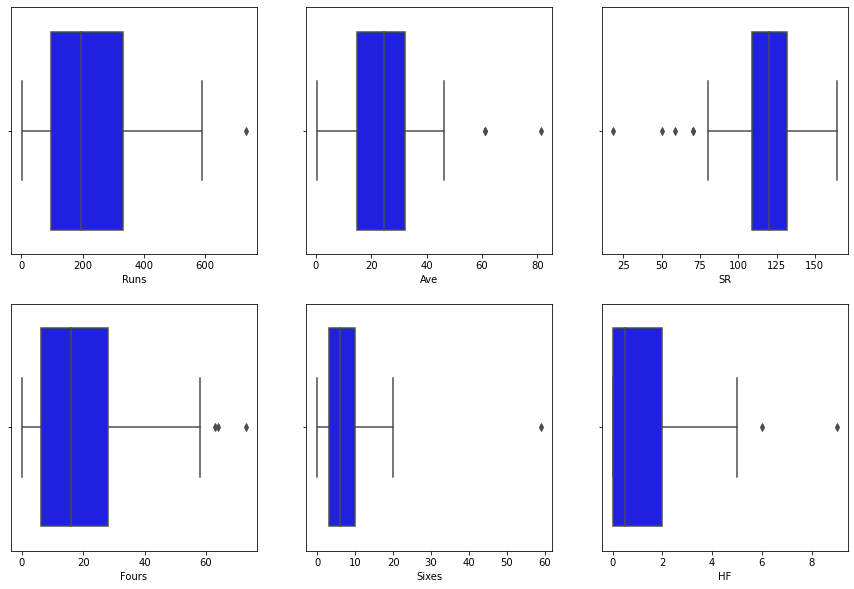

In [17]:
plt.figure(figsize=(15, 10))
col = 1
for i in df.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.boxplot(df[i],color='blue')
    col += 1

Box plot above indicates there are outliers in all the attributes . This needs to be treated

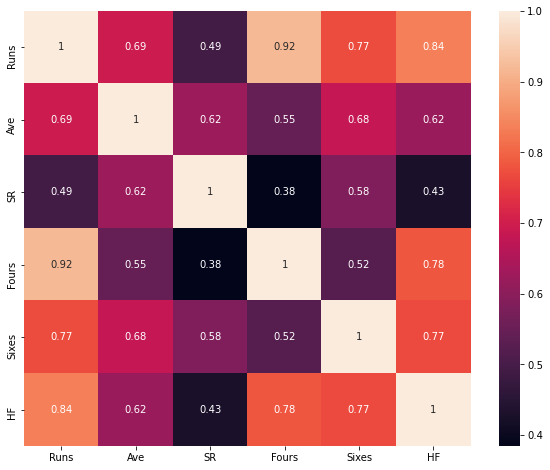

In [18]:
#checking for correlation
plt.figure(figsize=(10,8))
corr=df.drop(columns='Name').corr()
sns.heatmap(corr,annot=True);

<AxesSubplot:>

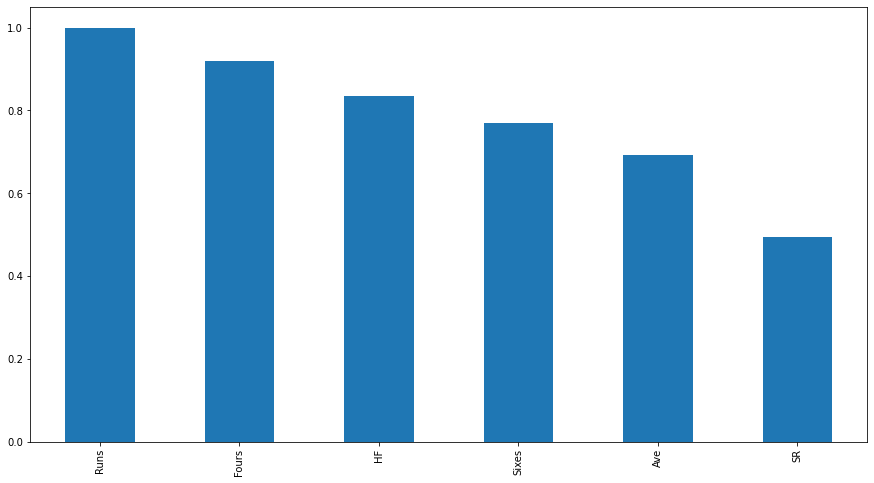

In [20]:
#Correlation of "SR" with other variables:
plt.figure(figsize=(15,8))
df.corr()['Runs'].sort_values(ascending = False).plot(kind='bar')

Runs is highly correlated with Fours and Half centuries

<AxesSubplot:>

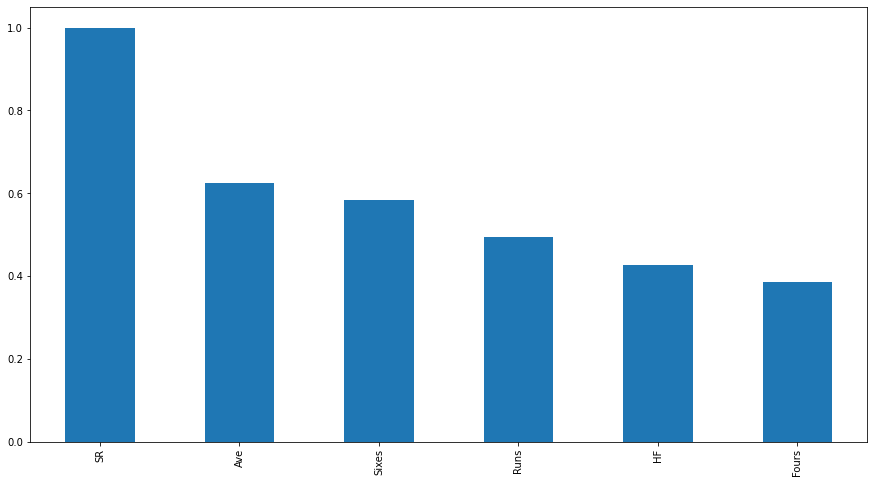

In [21]:
#Correlation of "SR" with other variables:
plt.figure(figsize=(15,8))
df.corr()['SR'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
Strike Rate is highly correlated with Average and Sixes

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


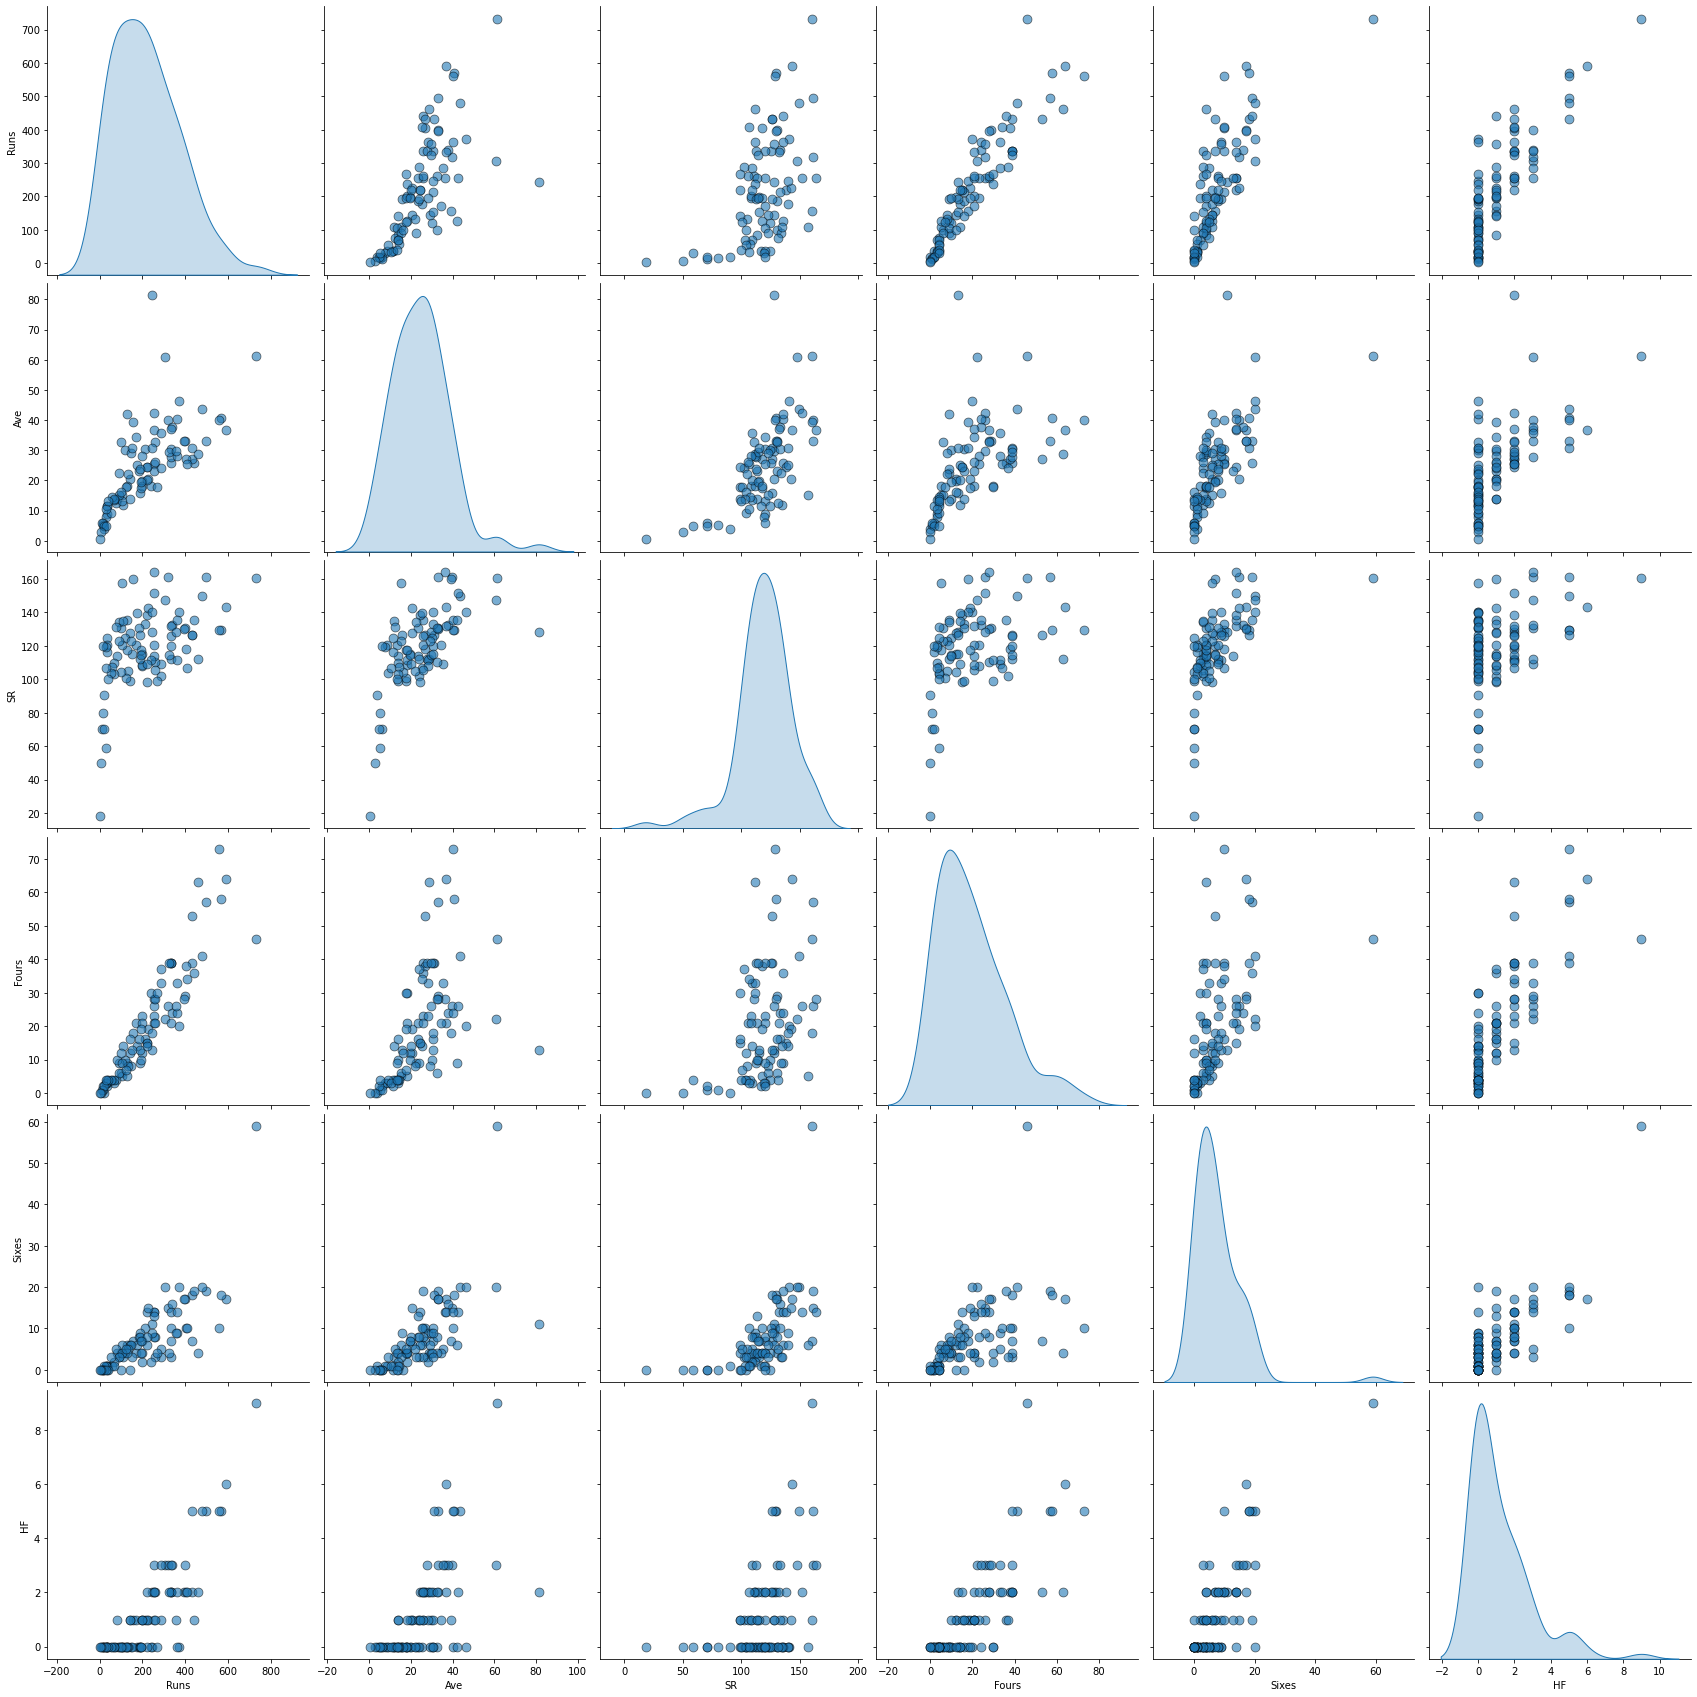

In [32]:
sns.pairplot(df,  diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4);

In [24]:
#scaling the numeric variables
cc = df.iloc[:,1:7] 
cc1 = cc.apply(zscore)
cc1.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


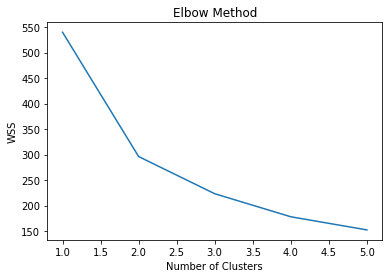

In [29]:
#plotting to check for optimal clustres 
plt.plot(range(1,6), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [30]:
#using 2 centroids
k_means = KMeans(n_clusters = 2)
k_means.fit(cc1)
labels = k_means.labels_

In [33]:
# Calculating silhouette_score
silhouette_score(cc1,labels)

0.41111085574076756

In [26]:

#plotting silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc1)
    score = silhouette_score(cc1,kmeans.labels_)
    silhouette_coefficients.append(score)

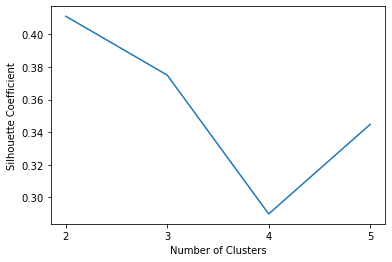

In [27]:
plt.plot(range(2,6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [37]:
#attaching the labels to the original data
df['cluster']=labels
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,1
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,1
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,1
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,1
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,1


In [38]:
#veiwing the distribution of the clusters
df.cluster.value_counts().sort_index()

0    55
1    35
Name: cluster, dtype: int64

In [39]:
#based on the above table renaming/ranking the playes in Grade A and Grade B
df['cluster'] = df['cluster'].replace({1: 'Rank A', 0: 'Rank B'})

In [44]:
#list of Grade A players
Rank_A = df[df['cluster'] == 'Rank A']
Rank_A.head(20)

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Rank A
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Rank A
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Rank A
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Rank A
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Rank A
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,Rank A
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,Rank A
15,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0,Rank A
17,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0,Rank A
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0,Rank A


In [47]:
#list of Grade B players
Rank_B = df[df['cluster'] == 'Rank B']
Rank_B.head(20)

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
69,MS Bisla,213.0,30.42,133.12,16.0,10.0,1.0,Rank B
73,BJ Hodge,245.0,30.62,140.00,18.0,9.0,0.0,Rank B
75,NV Ojha,255.0,23.18,113.83,21.0,13.0,1.0,Rank B
77,DB Das,126.0,42.00,135.48,9.0,6.0,0.0,Rank B
79,AC Gilchrist,172.0,34.40,120.27,21.0,4.0,1.0,Rank B
81,BB McCullum,289.0,24.08,102.12,37.0,3.0,1.0,Rank B
83,IK Pathan,176.0,25.14,139.68,14.0,6.0,0.0,Rank B
85,Azhar Mahmood,186.0,23.25,130.98,16.0,8.0,0.0,Rank B
87,MK Pandey,143.0,20.42,127.67,12.0,6.0,1.0,Rank B
89,S Badrinath,196.0,28.00,108.28,23.0,2.0,1.0,Rank B
